### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, classification_report
sns.set(style="white")

In [3]:
#Reading the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking the data info (information about the field and their types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- As we can see from the data info that 'TotalCharges' field has the datatype object, which needs to be changed to float, as the field represent the total charges(cost).

In [5]:
#'TotalCharges' column's data type is converted to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

- Checking for NULL values present in the dataframe

In [6]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

- The total charges column has total 11 null values present.
- As the no. of null values is very less, we can drop them from the dataframe

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#dropping the null values from the dataframe
df.dropna(inplace=True)

### Visualization Based on Demographics of customer

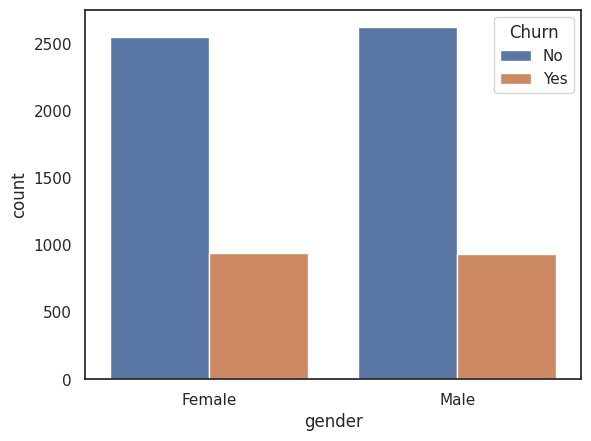

In [9]:
sns.countplot(x= df['gender'],hue= df['Churn'])
plt.show()

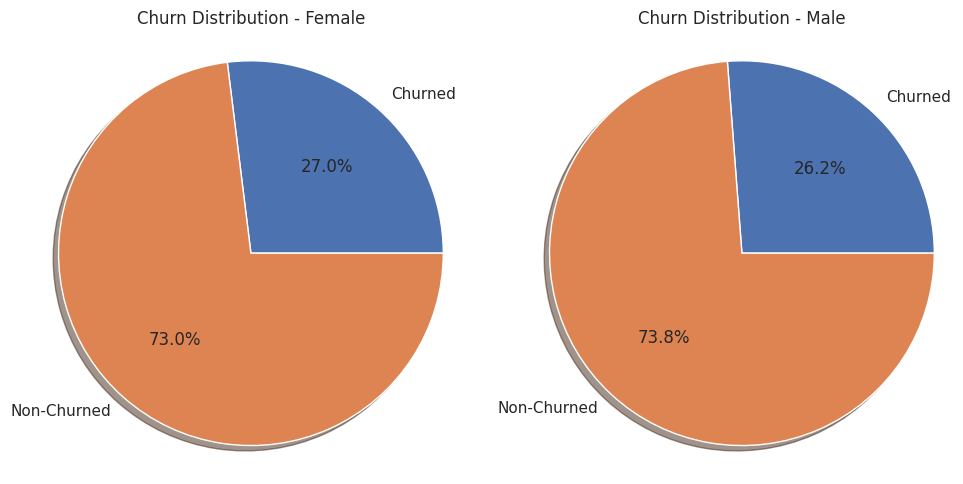

In [11]:
import matplotlib.pyplot as plt

# Calculate churn counts for each gender
churn_counts = df.groupby('gender')['Churn'].value_counts()

# Extract churn counts for churned and non-churned customers
churned_female = churn_counts['Female']['Yes']
non_churned_female = churn_counts['Female']['No']
churned_male = churn_counts['Male']['Yes']
non_churned_male = churn_counts['Male']['No']

# Create labels for the pie chart
labels = ['Churned', 'Non-Churned']

# Create sizes for the pie chart based on churn counts
sizes_female = [churned_female, non_churned_female]
sizes_male = [churned_male, non_churned_male]

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the pie chart for females
ax1.pie(sizes_female, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('Churn Distribution - Female')

# Create the pie chart for males
ax2.pie(sizes_male, labels=labels, autopct='%1.1f%%', shadow=True)
ax2.set_title('Churn Distribution - Male')

# Set aspect ratio to be equal so that pie is drawn as a circle
ax1.axis('equal')
ax2.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()


- Plot shows that the amount of churned customers within the two genders present are quite balanced, hence we can infer that gender won't be able to provide much information regarding the churn.

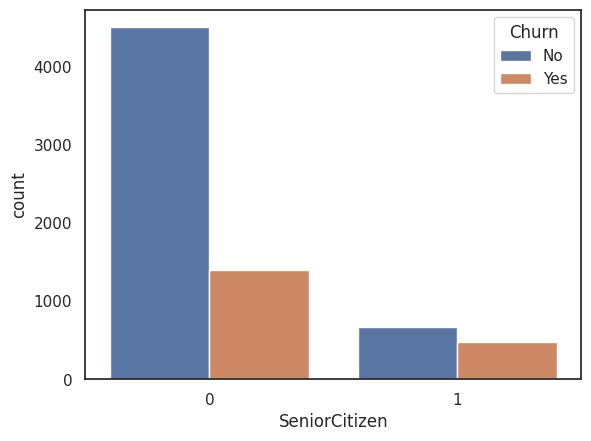

In [12]:
sns.countplot(x= df['SeniorCitizen'],hue= df['Churn'])
plt.show()

- It can be inferred that the percentage of churned customer is more in case if the customer belongs to the senior citizen category

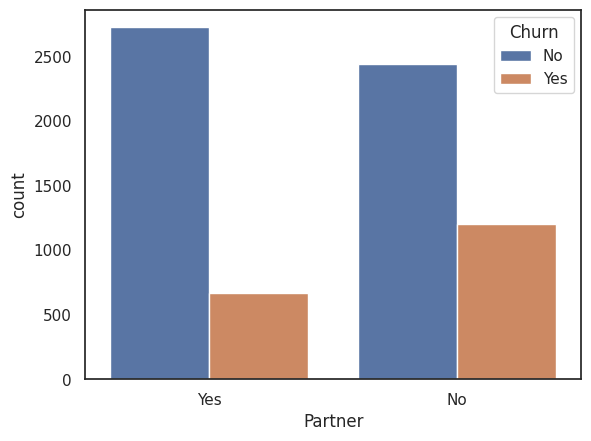

In [13]:
sns.countplot(x= df['Partner'],hue= df['Churn'])
plt.show()

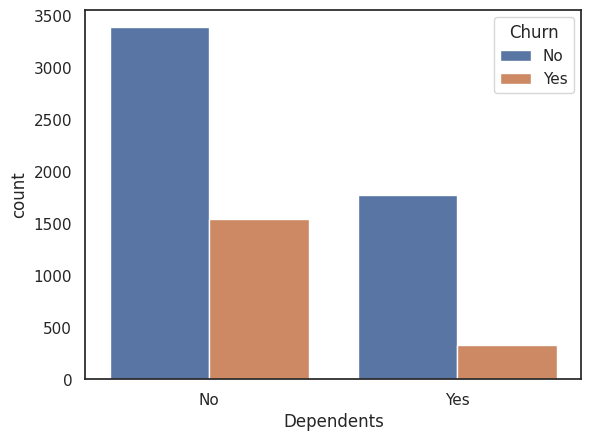

In [14]:
sns.countplot(x= df['Dependents'],hue= df['Churn'])
plt.show()

- It can be seen from the above two graphs that, a customer who does not have parter/dependent is more likely to churn

### Visualization based on services

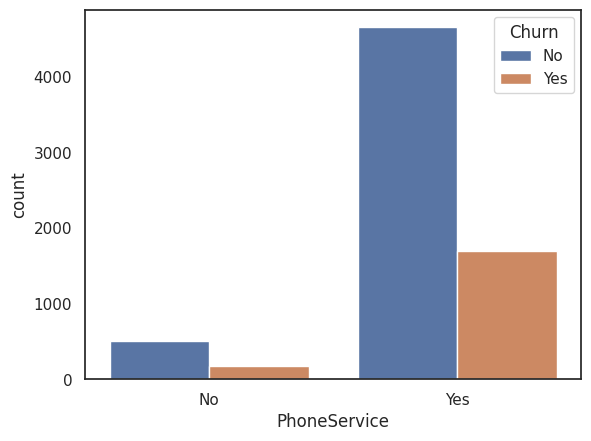

In [15]:
sns.countplot(x= df['PhoneService'],hue= df['Churn'])
plt.show()

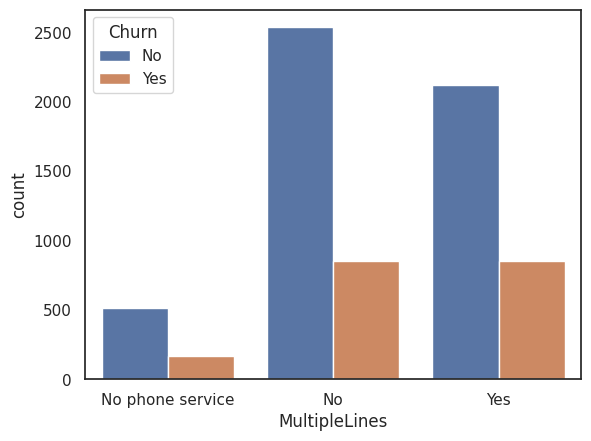

In [16]:
sns.countplot(x= df['MultipleLines'],hue= df['Churn'])
plt.show()

- Customer having multiple lines, is more likely to churn

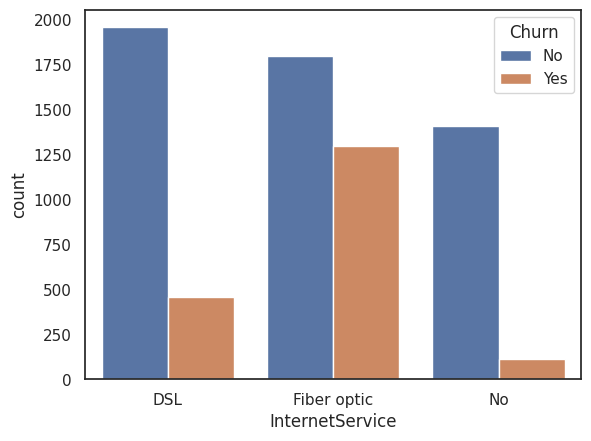

In [17]:
sns.countplot(x= df['InternetService'],hue= df['Churn'])
plt.show()

- Customer with 'Fiber optic service' is most likely to churn, as we see from the above graph

### Visualization based on customer account information

- tenure, Payment Method, Paperless Billing, Monthly charges, Total Charges, Streaming Tv, Streaming Movies

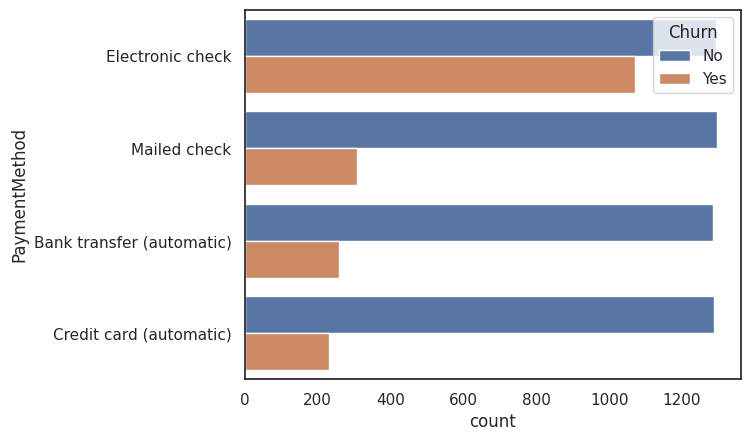

In [18]:
sns.countplot(y= df['PaymentMethod'],hue= df['Churn'])
plt.show()

- Customers paying through electronic check has the highest percentage of churn

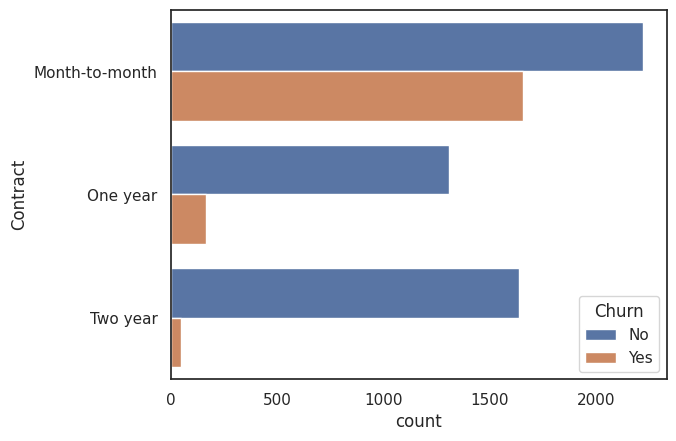

In [19]:
sns.countplot(y= df['Contract'],hue= df['Churn'])
plt.show()

- It can be seen from the above graph, that customer having month-to-month contract have the most probability to churn

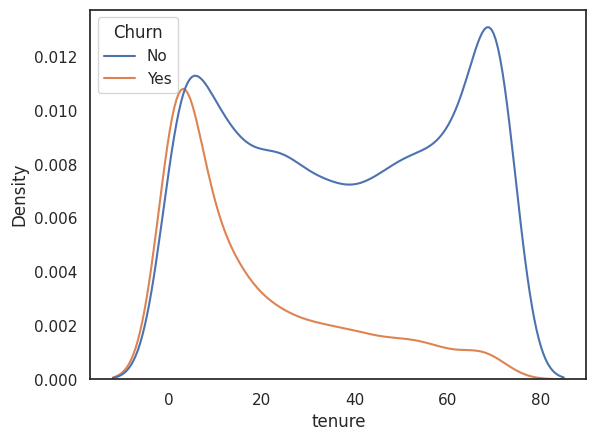

In [20]:
sns.kdeplot(x = "tenure",hue = 'Churn', data = df)
plt.show()

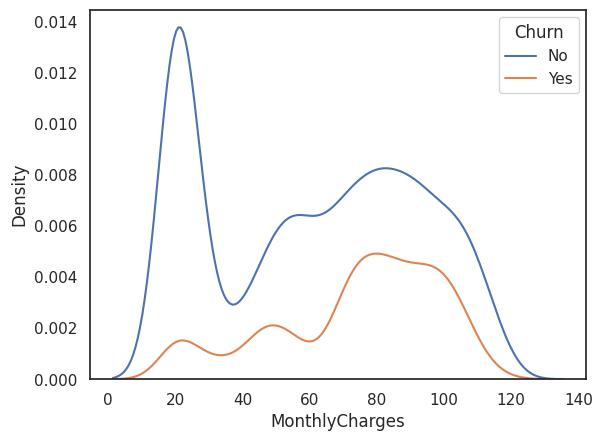

In [21]:
sns.kdeplot(x="MonthlyCharges", hue = 'Churn', data = df)
plt.show()

- We can see from the tenure graph, that most customer churn at 0-20 months of tenure, hence more attention needs to be given there.
- Customer paying high monthly charges(70-100), are most likely to churn.

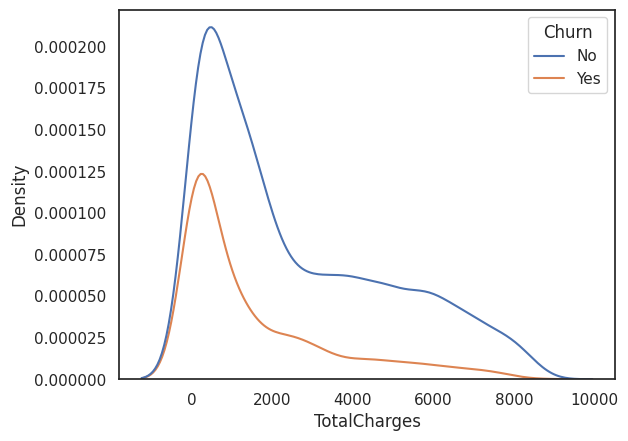

In [22]:
sns.kdeplot(x="TotalCharges", hue = 'Churn', data = df)
plt.show()

### Visualization of other services

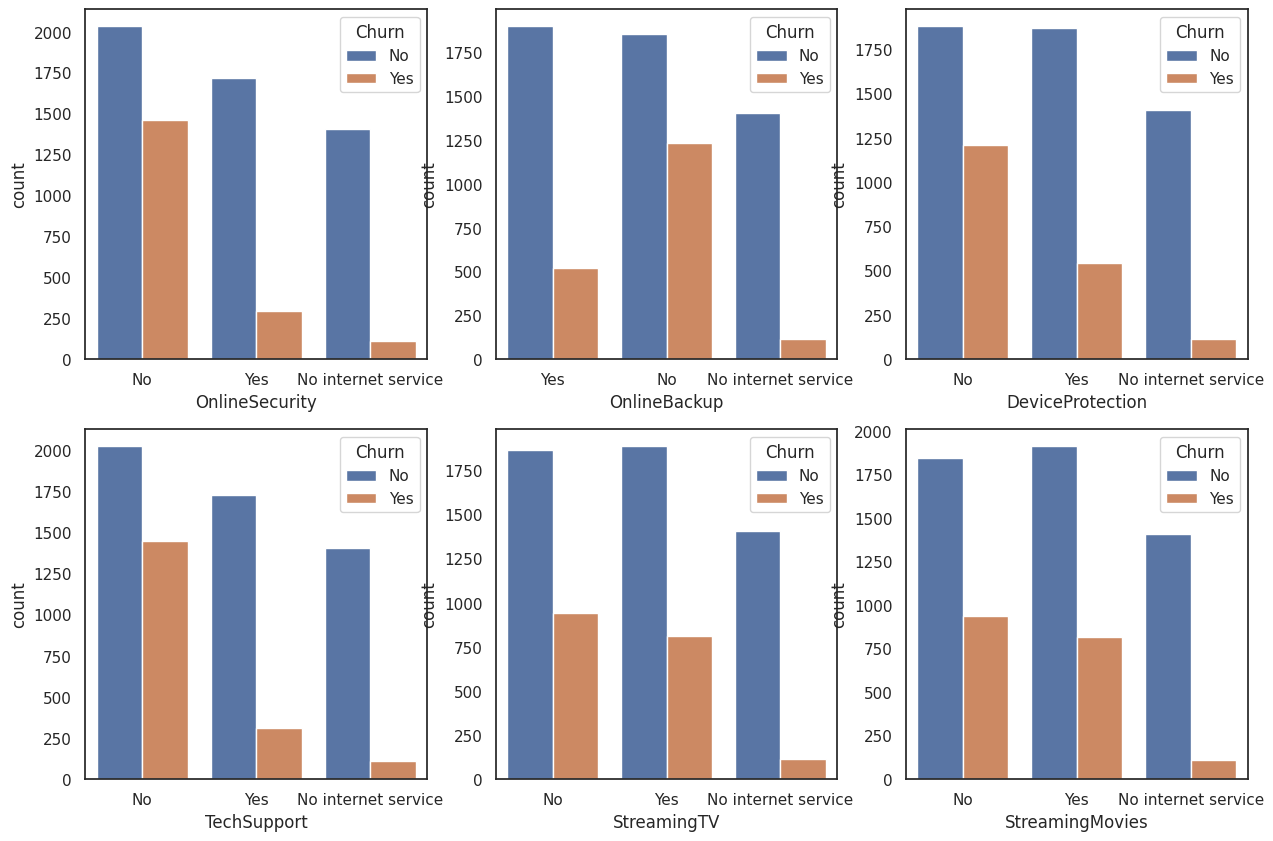

In [23]:
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
f, ax =  plt.subplots(2,3,figsize=(15,10))
ax = ax.flatten()
for i, feature in zip(ax, features):
    sns.countplot(x = df[feature], hue = df['Churn'], ax = i)
plt.show()

### Data Balance



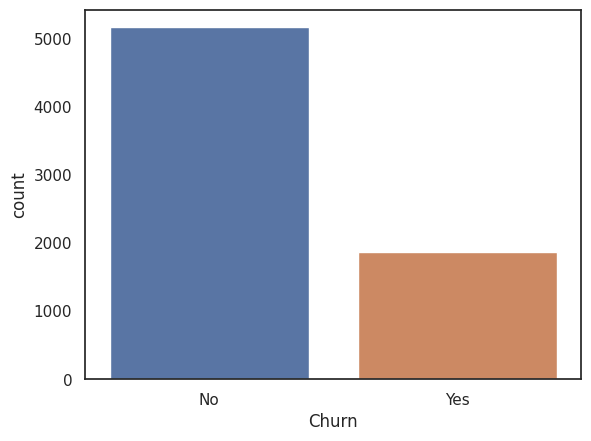

In [24]:
sns.countplot(x= df['Churn'])
plt.show()

- We can see from the below count, that there is imbalance in the dataset
- 73.42% of customers are in 'no churn' class and rest in 'churn' class.

In [25]:
df['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

- We'll follow the class weights approach to balance the dataset which can be passed while fitting the data in the regressor

## Feature Engineering




In [26]:
#dropping the customerID column
df.drop('customerID', inplace=True, axis=1)

#Changing column values: Female-1, Male-0
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Female' else 0)

#Changing column with binary values(Yes,No) to 1 and 0 respectively
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    df[column] = df[column].apply(lambda x: 1 if x=='Yes' else 0)

In [27]:
#getting dummy  variable for the columns with more than 2 categories(/values)
df = pd.get_dummies(df, columns= ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup',
                                                    'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies',
                                                    'Contract','PaymentMethod'])

In [28]:
#calculating pearson coefficient between the columns present
corr_df = df.corr()

a = abs(corr_df['Churn'])
values_list = a.values
#taking threshold as median of values obtained
threshold = statistics.median(values_list)
result = a[a>threshold]
filtered_columns_list = result.keys().tolist()

df = df[filtered_columns_list]

- Preparing the data (splits, selecting the columns)
- Test size set to 0.30

In [29]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y, shuffle = True, random_state = 0)

### Logistic Regression

- Algorithm applied to classification problems, which uses sigmoid cost function to limit the output between 0 and 1.

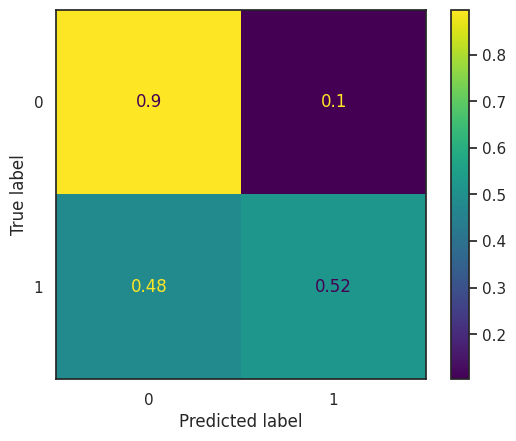

Training set accuracy:  0.802
Test set accuracy:  0.796
Precision score: 0.6452328159645233
Recall score: 0.5187165775401069
f1 score: 0.575098814229249


In [30]:
#fitting the regressor without balancing the classes(/dataset)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print("Training set accuracy: ", '%.3f'%(lr.score(X_train, y_train)))
print("Test set accuracy: ", '%.3f'%(lr.score(X_test, y_test)))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

Axes(0.125,0.11;0.775x0.77)


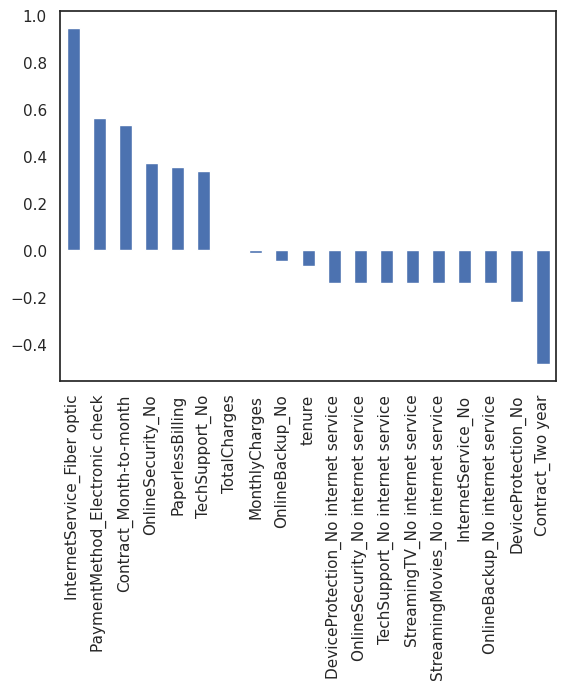

In [31]:
#plotting the coefficient for all the variables present
weights = pd.Series(lr.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False).plot.bar())

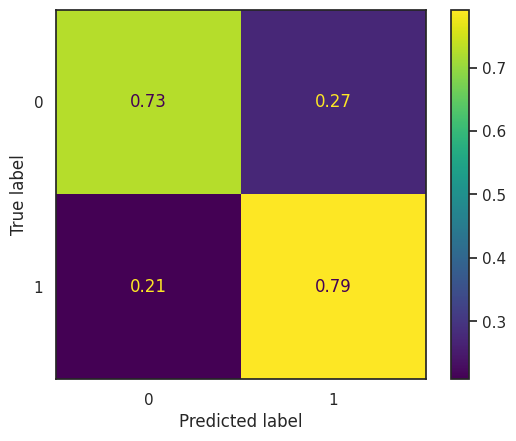

Training set accuracy:  0.743
Test set accuracy:  0.745
Precision score: 0.5127020785219399
Recall score: 0.7914438502673797
f1 score: 0.6222845129642607


In [32]:
#using balanced dataset
lr_bal = LogisticRegression(class_weight="balanced")
lr_bal.fit(X_train, y_train)
y_pred = lr_bal.predict(X_test)


cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print("Training set accuracy: ", '%.3f'%(lr_bal.score(X_train, y_train)))
print("Test set accuracy: ", '%.3f'%(lr_bal.score(X_test, y_test)))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

<Axes: >

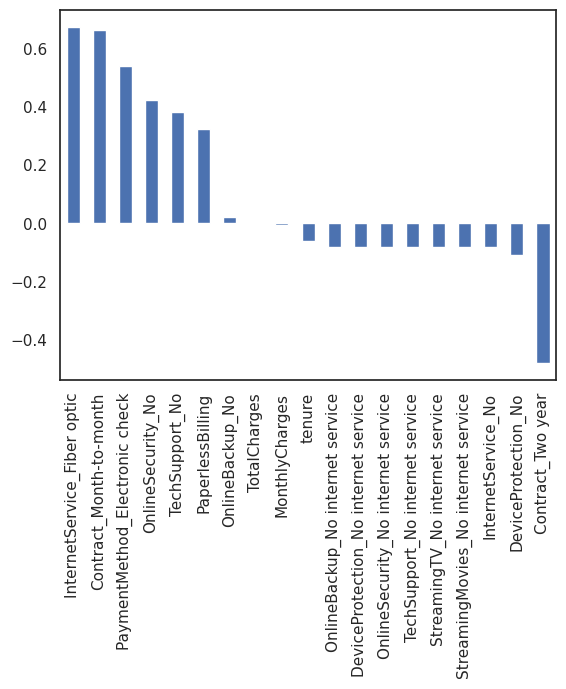

In [33]:
# To get the coeefficient of all the variables
weights = pd.Series(lr_bal.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False).plot(kind='bar')

### Random forest



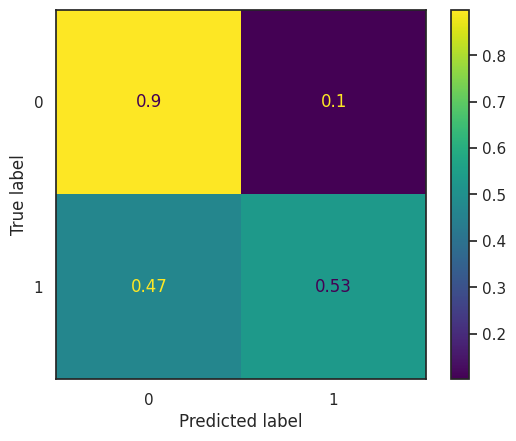

Training set accuracy:  0.877
Test set accuracy:  0.801
Precision score: 0.6557017543859649
Recall score: 0.5329768270944741
f1 score: 0.5880039331366764


In [34]:
#no balancing in dataset
rf = RandomForestClassifier(n_estimators=20, max_depth=10,random_state=42)
#n_estimators: no. of trees, max_depth: Maximum depth of each tree
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)



y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

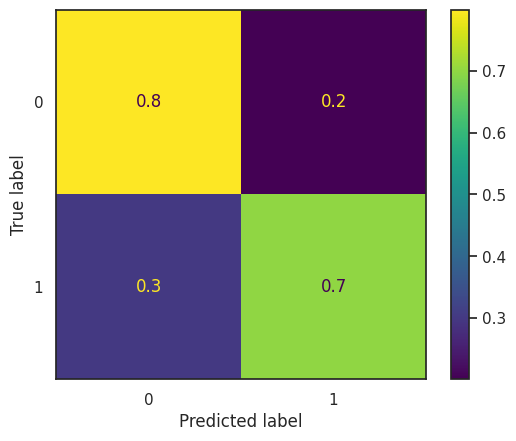

Training set accuracy:  0.862
Test set accuracy:  0.773
Precision score: 0.5582386363636364
Recall score: 0.7005347593582888
f1 score: 0.6213438735177865


In [35]:
rf_bal = RandomForestClassifier(n_estimators=20, max_depth=10,random_state=42, class_weight="balanced")
#n_estimators: no. of trees, max_depth: Maximum depth of each tree
rf_bal.fit(X_train, y_train)

y_pred = rf_bal.predict(X_test)


cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print("Training set accuracy: ", '%.3f'%(rf_bal.score(X_train, y_train)))
print("Test set accuracy: ", '%.3f'%(rf_bal.score(X_test, y_test)))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


In [44]:
best_params

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}

In [45]:
print("Training set accuracy: ", '%.3f'%(grid_search.score(X_train, y_train)))
print("Test set accuracy: ", '%.3f'%(grid_search.score(X_test, y_test)))

Training set accuracy:  0.804
Test set accuracy:  0.797
